<a href="https://colab.research.google.com/github/javadvahid/ML-course/blob/main/ML_course_project_6_Bias_VS_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias VS Variance



# Regularized Linear Regression




در بخش اول این پروژه هدف تخمین میزان خروجی آب سد با استفاده از تغیرات سطح آب در مخزن می باشد

همانطور که از صورت پروژه مشخص هست، باید از رگرسیون خطی برای حل این مسئله استفاده کنیم



:مشخصات دیتا

دیتای ورودی : سطح آب


دیتای خروجی : میزان خروجی



In [ ]:
#load data set from project6data1.mat file
#ذخیره شده است .mat دیتاست این پروژه در یک فایل با فرمت 
#first upload project6data1.mat to colab
#ابتدا فایل مربوطه را در این محیط آپلود کرده
#load the .mat file using scipy library
#تصاویر را در یک متغیر لود می کنیم scipy با استفاده از کتابخانه 
import numpy as np
from scipy.io import loadmat

data = loadmat('/content/project6data1.mat')



In [ ]:
data.keys()

In [ ]:
#split the data into X, Y, Xtest, Ytest, Xval, Yval
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#training input
X = data['X']
#training output
Y = data['y']
#test input
Xtest = data['Xtest']
#test output
Ytest = data['ytest']
#cross validation input
Xval = data['Xval']
#cross validation output
Yval = data['yval']
#find m
m = Y.shape[0]
mval = Yval.shape[0]
mtest = Ytest.shape[0]
print(m, mval, mtest)

In [ ]:
print(X.shape, Y.shape)

# Data Visualization:

# نمایش داده ها

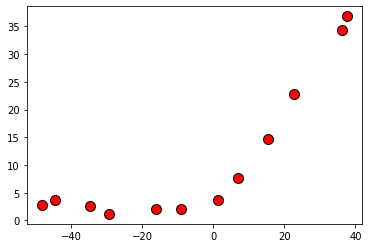

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', ms=10, mec='k')

# creating X and Y matrices with the right dimensions as shown in the slide

# دقیقا به صورتی که در اسلاید زیر نمایش داده شده است X,Y ایجاد ماتریس

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [ ]:
#Convert dimension of input data from (m, n) to (n, m)
#train data
X_ = np.transpose(X)
print(X_.shape)

#validation data
Xval_ = np.transpose(Xval)
print(Xval_.shape)

#test data
Xtest_ = np.transpose(Xtest)
print(Xtest_.shape)

(1, 12)
(1, 21)
(1, 21)


In [ ]:
#Convert dimension of outputs from (m, 1) to (1, m)
Y_ = np.transpose(Y)
print(Y_.shape)

Yval_ = np.transpose(Yval)
print(Yval_.shape)

Ytest_ = np.transpose(Ytest)
print(Ytest_.shape)

(1, 12)
(1, 21)
(1, 21)


In [ ]:
#add x0=1 to all the data 
#به همه داده ها x0=1 اضافه کردن 
X_ = np.concatenate([np.ones((1, m)), X_], axis=0)
print(X_.shape)

Xval_ = np.concatenate([np.ones((1, mval)), Xval_], axis=0)
print(Xval_.shape)

Xtest_ = np.concatenate([np.ones((1, mtest)), Xtest_], axis=0)
print(Xtest_.shape)

(2, 12)
(2, 21)
(2, 21)


# **Cost Function with Regularization: implementation**

# پیاده سازی تابع هزینه 





---
# First method: simple implementation using for loop as shown in the slide below

روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1_wgKFErdsV5O2LmK7jeN1couzGmIqcph">
</p>



---
# Second method: vectorized implementation 

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1nnKKgWVvh6UiKyJrl0TZcjC9r1DV3Y8P">
</p>




In [ ]:
#create a function for computing cost J
#تابعی بنویسید که تابع هزینه را محاسبه کند به صورت برداری
def computeCostWithReg(X, Y, thetatemp, lambda_):
  #find m
  m = X.shape[1]

  temp = np.matmul(np.transpose(thetatemp), X) - Y

  cost = np.matmul(temp, np.transpose(temp)) / (2*m)
  
  costWithReg = cost + (lambda_/(2*m)) * np.matmul(np.transpose(thetatemp[1:]), thetatemp[1:])

  return costWithReg


In [ ]:
#initialize theta to a zero vector of shape (X.shape[0],1)>>> np.zeros((X.shape[0],1))
#انتخاب تتای اولیه به صورت گفته شده 
theta = np.ones((X_.shape[0], 1))

#use the function you created to compute cost for initialized theta
costWithReg = computeCostWithReg(X_, Y_, theta, lambda_=1)
print("initial cost is:", costWithReg)

initial cost is: [[303.99319222]]


پاسخ صحیح در صورت پیاده سازی درست  [[303.99]]

# **Gradient Descent with Regularization: implementation**

#  پیاده سازی کاهش گرادیان همراه با مقید سازی 





---
# First method: simple implementation using for loop as shown in the slide below

# روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1tFnRJ5d7Bqdf1n_TU60ico94s-Q9uMnE">
</p>



---
# Second method: vectorized implementation 

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=15mcAS8NkkB55pAJbfLBHG39MO2WD67Qn">
</p>




In [ ]:
#create a function for gradient descent with regularization
#
def gradientDescentWithReg(X, Y, thetatemp, lr, epochs, lambda_):
  m = X.shape[1]
  print(m)
  J_history = []
  for epoch in range(epochs):
    thetatempreg = thetatemp.copy()
    thetatempreg[0,0] = 0
    #print("thetatemp", thetatemp[:,0])
    #print("thetatempreg",thetatempreg[:,0])
    
    h = np.matmul(np.transpose(thetatemp), X)
    temp = np.transpose(h - Y)
    thetatemp = thetatemp - (lr/m) * (np.matmul(X, temp) + lambda_ * thetatempreg)
    if(epoch==0):
      grad = (1/m) * (np.matmul(X, temp) + lambda_ * thetatempreg)  
    J_history.append(computeCostWithReg(X, Y, thetatemp, lambda_)[0, 0])

  return thetatemp, J_history, grad

In [ ]:

#initialize theta and train linear regression
#انتخاب مقادیر اولیه 0 برای تتا
theta = np.ones((X_.shape[0], 1))

#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
epochs = 1000
lr = 0.001
#run gradientDescent and print theta and last cost

thetanew, J_history, gradtest = gradientDescentWithReg(X_, Y_, theta, lr, epochs, 1)
#print theta
#print(thetanew)

#print first epoch grad
print(gradtest)
#print last cost >>> J_history[-1]
print("last cost: ", J_history[-1])




12
[[-15.30301567]
 [598.25074417]]
last cost:  32.55165315223135


In [ ]:
print(J_history)

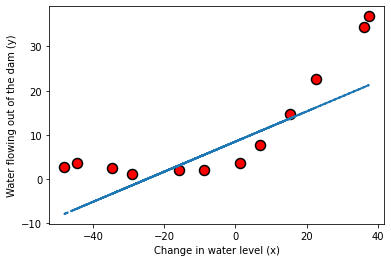

In [ ]:
#  Plot fit over the data
plt.plot(X_[1:, :], Y_, 'ro', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X_[1,:], np.matmul(thetanew.T, X_)[0,:], '--', lw=2);



# Bias VS Variance


# Learningcurves :

در این بخش با رسم منحنی های یادگیری میتونیم مشکل مدل را تشخیص بدیم و برای بهبود آن اقدام کنیم


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1Zt6_BPu4UfnLgmkyENSTidQ2qYAHeOqY">
</p>



In [ ]:
#create a function for learning curves
def learningCurve(X, Y, Xval, Yval, lambda_):
  #find m

  #create arrays for saving train and cross validation error
  train_error = np.zeros(m)
  val_error = np.zeros(m)

  #create a loop to compute train_error and val_error for different m 
  for i in range(1, m+1):
    theta = np.zeros((X.shape[0], 1))
    epochs = 100000
    lr = 0.001
    thetanew, J_history, gradtest = gradientDescentWithReg(X[:,:i], Y[:,:i], theta, lr, epochs, lambda_)

    train_error[i-1] = computeCostWithReg(X[:, :i], Y[:, :i], thetanew, 0)
    val_error[i-1] = computeCostWithReg(Xval, Yval, thetanew, 0)

  return train_error, val_error  


1
2
3
4
5
6
7
8
9
10
11
12
# Training Examples	Train Error	Cross Validation Error
  	1		0.000016	181.603572
  	2		0.000016	110.667776
  	3		3.286615	44.971999
  	4		2.842689	48.338954
  	5		13.154052	35.858531
  	6		19.443965	33.822654
  	7		20.098524	31.965551
  	8		18.172860	30.858614
  	9		22.609407	31.132841
  	10		23.261462	28.935174
  	11		24.317250	29.551049
  	12		22.373907	29.433177


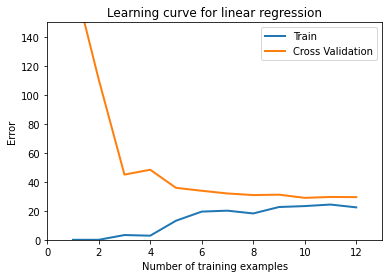

In [ ]:
J_train, J_cv = learningCurve(X_, Y_, Xval_, Yval_, lambda_=1)

plt.plot(np.arange(1, m+1), J_train, np.arange(1, m+1), J_cv, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, J_train[i], J_cv[i]))

In [ ]:
print(J_cv)

In [ ]:
#create a function for making polynomial features
#remember this function uses original data befor reshaping
def polyFeatures(X, p):
    

    X_poly = np.zeros((X.shape[0], p))

    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)

    return X_poly

In [ ]:
X_poly = polyFeatures(X, 8)
X_poly_val = polyFeatures(Xval, 8)
X_poly_test = polyFeatures(Xtest, 8)

print(X_poly.shape, X_poly_val.shape, X_poly_test.shape)

(12, 8) (21, 8) (21, 8)


In [ ]:
X_poly[:,1]

In [ ]:
X[:,0]

In [ ]:

def featureNormalize(X):
  X_norm = X.copy()
  mean = np.mean(X_norm, axis=0)
  range1 = np.max(X_norm, axis=0) - np.min(X_norm, axis=0)
  #we can also use standard deviation (sigma) instead of range = max - min
  #sigma = np.std(X_norm, axis=0)

  X_norm = (X_norm - mean)/(range1)
  #X_norm = (X_norm - mean)/(sigma)
  
  return X_norm, mean, range1

In [ ]:
#check to see if we need feature normalization
X_poly[0,:]

In [ ]:
X_poly.shape

In [ ]:
#apply feature normalization to data
#input shape must be (m x n) for feature normalize function to work properly
#
X_poly_norm, mean, range1 = featureNormalize(X_poly)


X_poly_normv = X_poly_val - mean
X_poly_normv /= range1


X_poly_normt = X_poly_test - mean
X_poly_normt /= range1




In [ ]:
print(X_poly_norm.shape)
print(X_poly_normv.shape)
print(X_poly_normt.shape)

(12, 8)
(21, 8)
(21, 8)


In [ ]:
#Convert dimension of input data from (m, n) to (n, m)
#train data
X_poly_norm_ = np.transpose(X_poly_norm)
print(X_poly_norm_.shape)

#validation data
X_poly_normv_ = np.transpose(X_poly_normv)
print(X_poly_normv_.shape)

#test data
X_poly_normt_ = np.transpose(X_poly_normt)
print(X_poly_normt_.shape)

(8, 12)
(8, 21)
(8, 21)


In [ ]:
#Convert dimension of outputs from (m, 1) to (1, m)
Y_ = np.transpose(Y)
print(Y_.shape)

Yval_ = np.transpose(Yval)
print(Yval_.shape)

Ytest_ = np.transpose(Ytest)
print(Ytest_.shape)

(1, 12)
(1, 21)
(1, 21)


In [ ]:
#add x0=1 to all the data 
#به همه داده ها x0=1 اضافه کردن 
X_poly_norm_ = np.concatenate([np.ones((1, m)), X_poly_norm_], axis=0)
print(X_poly_norm_.shape)

X_poly_normv_ = np.concatenate([np.ones((1, mval)), X_poly_normv_], axis=0)
print(X_poly_normv_.shape)

X_poly_normt_ = np.concatenate([np.ones((1, mtest)), X_poly_normt_], axis=0)
print(X_poly_normt_.shape)

(9, 12)
(9, 21)
(9, 21)


In [ ]:

#initialize theta and train linear regression
#انتخاب مقادیر اولیه 0 برای تتا
theta = np.ones((X_poly_norm_.shape[0], 1))

#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
epochs = 50000
lr = 0.003
#run gradientDescent and print theta and last cost

thetanew, J_history, gradtest = gradientDescentWithReg(X_poly_norm_, Y_, theta, lr, epochs, lambda_=0)
#print theta
#print(thetanew)

#print first epoch grad
print(gradtest)
#print last cost >>> J_history[-1]
print("last cost: ", J_history[-1])




12
[[-10.21758933]
 [ -3.39693417]
 [ -0.44731864]
 [ -2.38393571]
 [  0.13530747]
 [ -1.8589532 ]
 [  0.48272369]
 [ -1.52762138]
 [  0.67954436]]
last cost:  1.1776222300923562


In [ ]:
print(min(J_history))

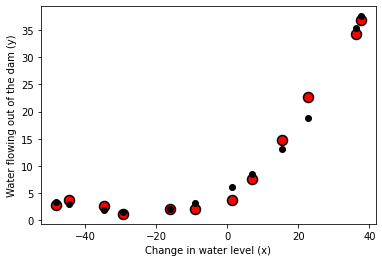

In [ ]:
#  Plot fit over the data
plt.plot(X_[1:, :], Y_, 'ro', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X_[1, :], np.matmul(thetanew.T, X_poly_norm_)[0,:], 'ko');



In [ ]:
#plotfit
def plotFit(polyFeatures, min_x, max_x, mean, range1, theta, p):

    x = np.arange(min_x - 15, max_x + 45, 0.05).reshape(-1, 1)
    print(x.shape)
    
    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mean
    X_poly /= range1
    print(X_poly.shape)
    X_poly = X_poly.T
    print(X_poly.shape)
    # Add ones
    X_poly = np.concatenate([np.ones((1, X_poly.shape[1])), X_poly], axis=0)

    # Plot
    plt.plot(x, np.matmul(theta.T, X_poly)[0,:], '--', lw=2)
    plt.xlim(-80, 80)
    plt.ylim(-60, 50)

(2912, 1)
(2912, 8)
(8, 2912)


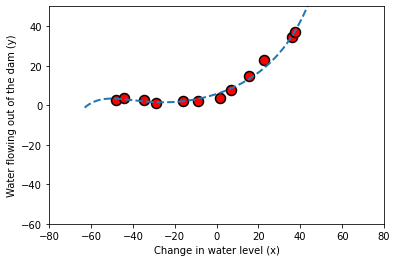

In [ ]:
min_x = np.min(X_[1,:])
max_x = np.max(X_[1,:])
#  Plot fit over the data
plt.plot(X_[1:, :], Y_, 'ro', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plotFit(polyFeatures, min_x, max_x, mean, range1, thetanew, 8)

In [ ]:

#model selection using different lambdas
def valCurve(X, Y, Xval, Yval, costfunction):   
  #create multiple choices for
  lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.4, 0.6, 1]
  error_train = np.zeros(len(lambda_vec))
  error_val = np.zeros(len(lambda_vec))
  
  for i in range(len(lambda_vec)):
    theta1 = np.ones((X.shape[0], 1))
    epochs = 500000
    lr = 0.003
    thetanew1, J_history, gradtest = gradientDescentWithReg(X, Y, theta1, lr, epochs, lambda_=lambda_vec[i])
    error_train[i] = costfunction(X, Y, thetanew1, lambda_=0)
    error_val[i] = costfunction(Xval, Yval, thetanew1, lambda_=0)
    print("train error", error_train[i])
    print("val error", error_val[i])
    print(J_history[-1])
  return lambda_vec, error_train, error_val

In [ ]:
print(X_poly_normv_.shape)
lambda_vec, J_train, J_cv = valCurve(X_poly_norm_, Y_, X_poly_normv_, Yval_, computeCostWithReg)

(9, 21)
12
train error 0.31408855416301035
val error 11.651451150942272
0.31408855416301035
12
train error 0.32246340001005147
val error 11.010046151164516
0.426559356144174
12
train error 0.344147623735574
val error 9.90594690510113
0.6387544673489637
12
train error 0.4501511800577512
val error 7.364157581236702
1.2865304665896706
12
train error 0.796288609809504
val error 4.891666092809964
2.7451344108725473
12
train error 1.7108247726564911
val error 3.971030081399649
6.573486627956686
12
train error 4.162438750792981
val error 3.4172947362466353
14.784555631689619
12
train error 5.583882436116228
val error 3.6757422331378384
18.11388433334543
12
train error 8.625003202115343
val error 5.084660593223865
23.72730671218728
12
train error 14.686704303829679
val error 9.671422433912882
32.09443941029495


lambda		Train Error	Validation Error
 0.000000	0.314089	11.651451
 0.001000	0.322463	11.010046
 0.003000	0.344148	9.905947
 0.010000	0.450151	7.364158
 0.030000	0.796289	4.891666
 0.100000	1.710825	3.971030
 0.300000	4.162439	3.417295
 0.400000	5.583882	3.675742
 0.600000	8.625003	5.084661
 1.000000	14.686704	9.671422


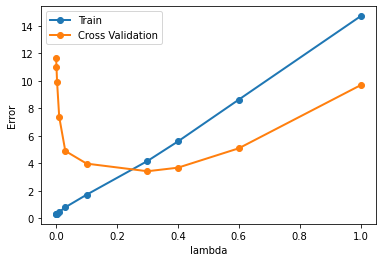

In [ ]:
plt.plot(lambda_vec, J_train, '-o', lambda_vec, J_cv, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], J_train[i], J_cv[i]))

In [ ]:
#train with the best lambda_
theta = np.ones((X_poly_norm_.shape[0], 1))

#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
epochs = 500000
lr = 0.003
#run gradientDescent and print theta and last cost

thetanew, J_history, gradtest = gradientDescentWithReg(X_poly_norm_, Y_, theta, lr, epochs, lambda_=0.3)

12


In [ ]:
def error_test(Xtest, Ytest):
  error_test = computeCostWithReg(Xtest, Ytest, thetanew, 0)
  return error_test
  

In [ ]:
J_test = error_test(X_poly_normt_, Ytest_)
print(J_test)

[[4.11635194]]
